In [31]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import re  

# Download the stopwords list if you haven't already
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Federico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
path = "Scripts TBBT.csv"
df = pd.read_csv(path,sep=",", skipinitialspace = True, engine ="python")

In [33]:
# Let's choose a character to analyse

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


# 1.

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

To answer this question we will have to perform sentence and word tokenization. To do so we will lowercase the text immediately and remove the punctation only after sentence tokenization. 


In [15]:
# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Sentence Tokenization
df_character["sentences"] = df_character['dialogue'].apply(sent_tokenize)

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Split the text into words based on spaces
df_character["words"] = df_character['dialogue'].str.split()

# Using split instead of word_tokenize to handle apostrophes:
#  "there's" as single word, instead of 3 ("there" "'" "s")
# df_character["words"] = df_character['dialogue'].apply(word_tokenize)


# Display the DataFrame
df_character

,episode_name,dialogue,person_scene,sentences,words
1,Series 01 Episode 01 – Pilot Episode,so if a photon is directed through a plane wi...,Sheldon,[ so if a photon is directed through a plane w...,"[so, if, a, photon, is, directed, through, a, ..."
3,Series 01 Episode 01 – Pilot Episode,there’s no point i just think it’s a good ide...,Sheldon,"[ there’s no point, i just think it’s a good i...","[there’s, no, point, i, just, think, it’s, a, ..."
10,Series 01 Episode 01 – Pilot Episode,i think this is the place,Sheldon,[i think this is the place.],"[i, think, this, is, the, place]"
14,Series 01 Episode 01 – Pilot Episode,leonard i don’t think i can do this,Sheldon,"[ leonard, i don’t think i can do this.]","[leonard, i, don’t, think, i, can, do, this]"
16,Series 01 Episode 01 – Pilot Episode,no we are committing genetic fraud there’s no...,Sheldon,"[ no., we are committing genetic fraud., there...","[no, we, are, committing, genetic, fraud, ther..."
...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,uh breakfast yes lunch no i did have a cough ...,Sheldon,"[ uh, breakfast yes, lunch no., i did have a c...","[uh, breakfast, yes, lunch, no, i, did, have, ..."
54399,Series 10 Episode 24 – The Long Distance Disso...,how thoughtful thank you,Sheldon,"[how thoughtful., thank you.]","[how, thoughtful, thank, you]"
54401,Series 10 Episode 24 – The Long Distance Disso...,and i with you question are you seeking a rom...,Sheldon,"[ and i with you., question, are you seeking a...","[and, i, with, you, question, are, you, seekin..."
54403,Series 10 Episode 24 – The Long Distance Disso...,well that would raise a number of problems we...,Sheldon,"[ well, that would raise a number of problems....","[well, that, would, raise, a, number, of, prob..."


In [16]:
# Counting the words and the sentences per dialogue


df_character['words_count'] = df_character['words'].apply(lambda x: len(x))
df_character['sentences_count'] = df_character['sentences'].apply(lambda x: len(x))


df_character

,episode_name,dialogue,person_scene,sentences,words,words_count,sentences_count
1,Series 01 Episode 01 – Pilot Episode,so if a photon is directed through a plane wi...,Sheldon,[ so if a photon is directed through a plane w...,"[so, if, a, photon, is, directed, through, a, ...",54,2
3,Series 01 Episode 01 – Pilot Episode,there’s no point i just think it’s a good ide...,Sheldon,"[ there’s no point, i just think it’s a good i...","[there’s, no, point, i, just, think, it’s, a, ...",13,1
10,Series 01 Episode 01 – Pilot Episode,i think this is the place,Sheldon,[i think this is the place.],"[i, think, this, is, the, place]",6,1
14,Series 01 Episode 01 – Pilot Episode,leonard i don’t think i can do this,Sheldon,"[ leonard, i don’t think i can do this.]","[leonard, i, don’t, think, i, can, do, this]",8,1
16,Series 01 Episode 01 – Pilot Episode,no we are committing genetic fraud there’s no...,Sheldon,"[ no., we are committing genetic fraud., there...","[no, we, are, committing, genetic, fraud, ther...",36,4
...,...,...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,uh breakfast yes lunch no i did have a cough ...,Sheldon,"[ uh, breakfast yes, lunch no., i did have a c...","[uh, breakfast, yes, lunch, no, i, did, have, ...",21,2
54399,Series 10 Episode 24 – The Long Distance Disso...,how thoughtful thank you,Sheldon,"[how thoughtful., thank you.]","[how, thoughtful, thank, you]",4,2
54401,Series 10 Episode 24 – The Long Distance Disso...,and i with you question are you seeking a rom...,Sheldon,"[ and i with you., question, are you seeking a...","[and, i, with, you, question, are, you, seekin...",13,2
54403,Series 10 Episode 24 – The Long Distance Disso...,well that would raise a number of problems we...,Sheldon,"[ well, that would raise a number of problems....","[well, that, would, raise, a, number, of, prob...",19,3


We will now calculate the average words and sentences for episodes

In [17]:
total_episodes = df['episode_name'].nunique()

total_words = df_character['words_count'].sum()
total_sentences = df_character['sentences_count'].sum()

average_words_per_episode = total_words / total_episodes
print(f"Average words for episodes: {average_words_per_episode:.2f}")

average_sentences_per_episode = total_sentences / total_episodes
print(f"Average senteces for episodes: {average_sentences_per_episode:.2f}")


Average words for episodes: 740.90
Average senteces for episodes: 94.33


To calculate the average number of words and sentences for episode we have to:

1. Create a "season" column based on the "episode_name."
1. Group the data by the newly created "season" and episode.
1. Calculate the number of episodes in each season.
1. Calculate the total number of words for each episode within the selected character's dialogue.
1. Finally, compute the average number of words spoken per episode per season.

In [18]:
# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# For words

# Group by season and episode, calculate the sum of words for each episode
episode_word_counts = df_character.groupby(['season', 'episode_name'])['words_count'].sum().reset_index()

# Calculate the number of episodes in each season
season_episode_counts = episode_word_counts.groupby('season')['episode_name'].count()

# Calculate the total number of words per season
season_word_counts = episode_word_counts.groupby('season')['words_count'].sum()

# Compute the average number of words spoken per episode per season
average_words_per_episode_per_season = season_word_counts / season_episode_counts

print("Average Words Spoken per Episode per Season for Character:", assigned_character)
print(average_words_per_episode_per_season)

print(f"Average words for episodes: {average_words_per_episode:.2f}")

# For sentences

# Group by season and episode, calculate the sum of words for each episode
episode_sentences_counts = df_character.groupby(['season', 'episode_name'])['sentences_count'].sum().reset_index()

# Calculate the total number of words per season
season_sentences_counts = episode_sentences_counts.groupby('season')['sentences_count'].sum()

# Compute the average number of words spoken per episode per season
average_sentences_per_episode_per_season = season_sentences_counts / season_episode_counts

print("Average Words Spoken per Episode per Season for Character:", assigned_character)
print(average_sentences_per_episode_per_season)

print(f"Average sentences for episodes: {average_sentences_per_episode:.2f}")


Average Words Spoken per Episode per Season for Character: Sheldon
season
1     865.705882
2     846.565217
3     869.043478
4     768.750000
5     721.666667
6     661.916667
7     662.000000
8     700.583333
9     702.583333
10    656.333333
dtype: float64
Average words for episodes: 740.90
Average Words Spoken per Episode per Season for Character: Sheldon
season
1      94.176471
2     100.478261
3     110.391304
4     103.958333
5      95.833333
6      88.291667
7      88.208333
8      88.458333
9      90.000000
10     84.375000
dtype: float64
Average sentences for episodes: 94.33


There is a stable decrease in the average number of words spoken per episode and the average number of sentences per episode as the series progresses through all the seasons.

# 2. 

Globally, over all episodes within the first 10 seasons, how many times does your
character mention nouns, and person names? 

Make a Wordcloud of this tag/entity to
have a clear visualization which nouns/person names are mostly used by your character.

In [8]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


In [9]:
import spacy
from collections import Counter


# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the entire dialogue column using nlp.pipe()
processed_dialogues = nlp.pipe(df_character["dialogue"])

# Extract nouns and proper nouns, remove stop words, and flatten the list
noun_propn_list = [
    token.text 
    for doc in processed_dialogues 
    for token in doc 
    if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop
]

# Count the occurrences of each type
type_counter = Counter(noun_propn_list)

# Print the ten most frequent types
print("Ten most frequent types:")
for token, count in type_counter.most_common(10):
    print(f"{token}: {count}")




Ten most frequent types:
Leonard: 744
knock: 570
Penny: 504
time: 370
Amy: 338
Knock: 271
people: 193
way: 188
man: 154
night: 153


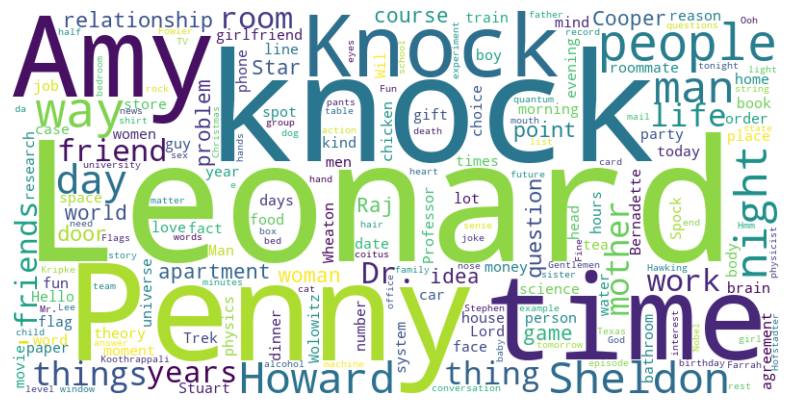

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(type_counter)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3.

What are the most important words mentioned by your character? Do this analysis
per episode, per season and overall over the first 10 seasons. To achieve this task,
please first make a bag-of-words and/or use the TF-IDF statistical principle. Remark:
You can try to make a Wordcloud for visualization, based on the given bag-of-words.

In [34]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

In [35]:
from nltk.corpus import stopwords
import re


# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Split the text into words based on spaces
df_character["words"] = df_character['dialogue'].str.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
df_character["words"] = df_character["words"].apply(lambda words: [word for word in words if word not in stop_words])


After cleaning and preprocessing the text data by removing punctuation, converting to lowercase, and removing stop words, we can proceed creating a bag-of-words (TF-IDF representation will be done after)

c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


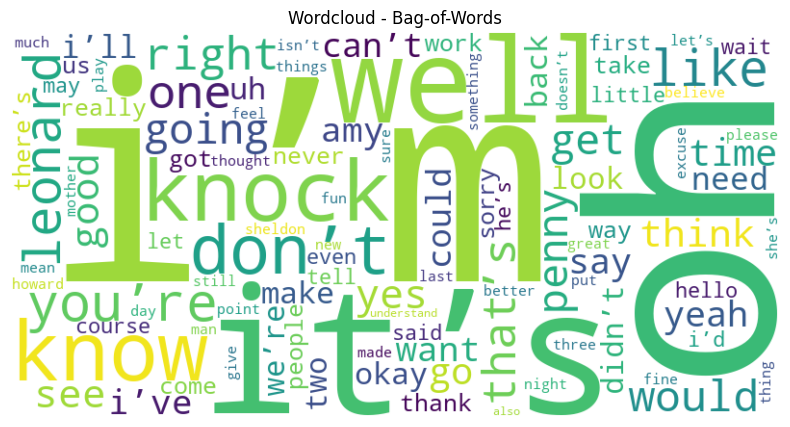

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Custom tokenizer that preserves contractions
def custom_tokenizer(text):
    return text.split()

# Combine the lists of words into space-separated strings
df_character['cleaned_text'] = df_character['words'].apply(lambda x: ' '.join(x))

# Create a bag-of-words representation with the custom tokenizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
bow_matrix = vectorizer.fit_transform(df_character['cleaned_text'])

# Sum the counts across all documents to get the total frequency of each word
word_frequencies = np.sum(bow_matrix, axis=0)

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - Bag-of-Words')
plt.show()


In [42]:
# Identify the top 10 most frequent words
top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]
top_word_frequencies = [word_freq_dict[word] for word in top_words]

# Print the top 10 most frequent words and their frequencies
for word, frequency in zip(top_words, top_word_frequencies):
    print(f"{word}: {frequency} times")


i’m: 1365 times
oh: 1079 times
it’s: 954 times
well: 911 times
knock: 853 times
know: 816 times
don’t: 807 times
you’re: 744 times
leonard: 696 times
like: 669 times


In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

# Create a TF-IDF transformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the bag-of-words matrix to obtain the TF-IDF representation
tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df.head()


,0,01100111,018,0400,0700,1,10,100,10000,100gigabitpersecond,...,“thanks,“waltz”,“wesley”,“with,“world’s,“would,“ye,…playing,…the,…tion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Sum the TF-IDF scores for each term across all documents
term_importance = tfidf_df.sum()

# Convert the result to a DataFrame for better manipulation
term_importance_df = pd.DataFrame({'Term': term_importance.index, 'Importance': term_importance.values})

# Sort the DataFrame by importance in descending order
term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N terms (e.g., top 10)
top_terms = term_importance_df.head(10)
print(top_terms)


          Term  Importance
7051       i’m  237.040095
9114        oh  223.591351
14338     well  188.658960
3995     don’t  177.293529
7044      it’s  177.066412
7562   leonard  156.917646
7332      know  156.686133
14685      yes  154.665475
14724   you’re  154.064274
11104    right  139.930636


Now we can do the same by series and episodes

In [53]:

# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# Initialize an empty list to store DataFrames for each season
season_dfs = []

# Loop through each season
for season in range(1, 11):
    # Filter the DataFrame for the current season using .loc
    season_df = df_character.loc[df_character['season'] == season].copy()

    # Combine the lists of words into space-separated strings
    season_df['cleaned_text'] = season_df['words'].apply(lambda x: ' '.join(x))

    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
    bow_matrix = vectorizer.fit_transform(season_df['cleaned_text'])

    # Sum the counts across all documents to get the total frequency of each word
    word_frequencies = np.sum(bow_matrix, axis=0)

    # Create a dictionary of word frequencies
    word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

    # Identify the top 10 most frequent words for the current season
    top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]
    print(top_words)
    # Create a DataFrame for the current season's top words
    season_top_words_df = pd.DataFrame({'Season': [season] * 10, 'Top Words': top_words})

    # Append the DataFrame to the list
    season_dfs.append(season_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_season = pd.concat(season_dfs, ignore_index=True)

# Print the results
for season in range(1, 11):
    print(f"Season {season}: ", end="")
    for word in range(0, 9):
        words_for_season = top_words_per_season.loc[top_words_per_season['Season'] == season, 'Top Words'].iloc[word]
        print(f"{words_for_season} ", end="")
    print()  # Add a newline after each season


c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\t

['i’m', 'don’t', 'well', 'it’s', 'leonard', 'would', 'oh', 'knock', 'know', 'going']
['i’m', 'it’s', 'don’t', 'leonard', 'oh', 'penny', 'you’re', 'know', 'well', 'one']
['knock', 'i’m', 'leonard', 'it’s', 'don’t', 'oh', 'penny', 'right', 'well', 'you’re']
['i’m', 'knock', 'it’s', 'oh', 'leonard', 'don’t', 'right', 'penny', 'yes', 'you’re']
['oh', 'i’m', 'it’s', 'knock', 'you’re', 'don’t', 'know', 'like', 'leonard', 'right']
['i’m', 'oh', 'knock', 'it’s', 'know', 'well', 'like', 'don’t', 'you’re', 'leonard']
['i’m', 'oh', 'don’t', 'know', 'well', 'you’re', 'it’s', 'knock', 'one', 'that’s']
['oh', 'i’m', 'well', 'it’s', 'know', 'like', 'you’re', 'knock', 'one', 'don’t']
['well', 'i’m', 'oh', 'know', 'like', 'it’s', 'you’re', 'don’t', 'knock', 'get']
['i’m', 'oh', 'know', 'well', 'it’s', 'you’re', 'like', 'don’t', 'that’s', 'get']
Season 1: i’m don’t well it’s leonard would oh knock know 
Season 2: i’m it’s don’t leonard oh penny you’re know well 
Season 3: knock i’m leonard it’s don’t oh

c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [56]:

# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# Initialize an empty list to store DataFrames for each season
season_dfs = []

# Loop through each season
for season in range(1, 11):
    # Filter the DataFrame for the current season using .loc
    season_df = df_character.loc[df_character['season'] == season].copy()

    # Combine the lists of words into space-separated strings
    season_df['cleaned_text'] = season_df['words'].apply(lambda x: ' '.join(x))

    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
    bow_matrix = vectorizer.fit_transform(season_df['cleaned_text'])

    # Fit and transform the bag-of-words matrix to obtain the TF-IDF representation
    tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix)

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Sum the TF-IDF scores for each term across all sentences
    term_importance = tfidf_df.sum()

    # Convert the result to a DataFrame for better manipulation
    term_importance_df = pd.DataFrame({'Term': term_importance.index, 'Importance': term_importance.values})

    # Sort the DataFrame by importance in descending order
    term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False).head(10)
    
    # Create a list of top words for the current season
    top_words_for_season = term_importance_df['Term'].tolist()
    
    # Create a DataFrame for the current season's top words
    season_top_words_df = pd.DataFrame({'Season': [season] * 10, 'Top Words': top_words_for_season})
    
    # Append the DataFrame to the list
    season_dfs.append(season_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_season = pd.concat(season_dfs, ignore_index=True)

# Print the results
for season in range(1, 11):
    print(f"Season {season}: ", end="")
    for word in range(0, 10):
        words_for_season = top_words_per_season.loc[top_words_per_season['Season'] == season, 'Top Words'].iloc[word]
        print(f"{words_for_season} ", end="")
    print()  # Add a newline after each season


c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\t

Season 1: don’t i’m well leonard it’s oh would yes think you’re 
Season 2: i’m oh don’t penny leonard it’s yes you’re right well 
Season 3: i’m don’t leonard oh knock it’s right yes you’re penny 
Season 4: i’m yes oh it’s right leonard don’t you’re know that’s 
Season 5: oh i’m it’s leonard you’re don’t know get well like 
Season 6: oh i’m well don’t it’s know yes like yeah you’re 
Season 7: i’m oh don’t well know you’re that’s it’s get right 
Season 8: oh well i’m it’s know you’re like one leonard okay 
Season 9: oh well i’m know like it’s you’re don’t right that’s 
Season 10: i’m oh well know it’s you’re don’t like that’s yes 


c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


By episode

In [57]:
import re

# Extract season and episode numbers using regular expressions
season_episode_pattern = re.compile(r'Series (\d+) Episode (\d+)')
matches = df_character['episode_name'].str.extract(season_episode_pattern)

# Combine the extracted season and episode numbers to create the new column
df_character['season_episode'] = matches[0].str.zfill(2) + '-' + matches[1].str.zfill(2)

# Print the DataFrame to check the new column
print(df_character[['episode_name', 'season_episode']])


                                            episode_name season_episode
1                   Series 01 Episode 01 – Pilot Episode          01-01
3                   Series 01 Episode 01 – Pilot Episode          01-01
10                  Series 01 Episode 01 – Pilot Episode          01-01
14                  Series 01 Episode 01 – Pilot Episode          01-01
16                  Series 01 Episode 01 – Pilot Episode          01-01
...                                                  ...            ...
54397  Series 10 Episode 24 – The Long Distance Disso...          10-24
54399  Series 10 Episode 24 – The Long Distance Disso...          10-24
54401  Series 10 Episode 24 – The Long Distance Disso...          10-24
54403  Series 10 Episode 24 – The Long Distance Disso...          10-24
54405  Series 10 Episode 24 – The Long Distance Disso...          10-24

[11484 rows x 2 columns]


In [ ]:
# Initialize an empty list to store DataFrames for each episode
episode_dfs = []

# Loop through each episode
for season_episode in df_character['season_episode'].unique():
    # Filter the DataFrame for the current episode using .loc
    episode_df = df_character.loc[df_character['season_episode'] == season_episode].copy()

    # Combine the lists of words into space-separated strings
    episode_df['cleaned_text'] = episode_df['words'].apply(lambda x: ' '.join(x))

    # Create a bag-of-words representation for the current episode
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(episode_df['cleaned_text'])

    # Sum the counts across all documents to get the total frequency of each word
    word_frequencies = np.sum(bow_matrix, axis=0)

    # Create a dictionary of word frequencies
    word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

    # Identify the top 10 most frequent words for the current episode
    top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]

    # Create a DataFrame for the current episode's top words
    episode_top_words_df = pd.DataFrame({'Episode': [season_episode] * 10, 'Top Words': top_words})

    # Append the DataFrame to the list
    episode_dfs.append(episode_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_episode = pd.concat(episode_dfs, ignore_index=True)


In [59]:
# Initialize an empty list to store DataFrames for each episode
episode_dfs = []

# Loop through each episode
for season_episode in df_character['season_episode'].unique():
    # Filter the DataFrame for the current episode using .loc
    episode_df = df_character.loc[df_character['season_episode'] == season_episode].copy()

    # Combine the lists of words into space-separated strings
    episode_df['cleaned_text'] = episode_df['words'].apply(lambda x: ' '.join(x))

    # Create a bag-of-words representation for the current episode
    vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
    bow_matrix = vectorizer.fit_transform(episode_df['cleaned_text'])

    # Fit and transform the bag-of-words matrix to obtain the TF-IDF representation
    tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix)

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Sum the TF-IDF scores for each term across all sentences
    term_importance = tfidf_df.sum()

    # Convert the result to a DataFrame for better manipulation
    term_importance_df = pd.DataFrame({'Term': term_importance.index, 'Importance': term_importance.values})

    # Sort the DataFrame by importance in descending order
    term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False).head(10)
    
    # Create a list of top words for the current episode
    top_words_for_episode = term_importance_df['Term'].tolist()
    
    # Create a DataFrame for the current episode's top words
    episode_top_words_df = pd.DataFrame({'Episode': [season_episode] * 10, 'Top Words': top_words_for_episode})

    # Append the DataFrame to the list
    episode_dfs.append(episode_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_episode = pd.concat(episode_dfs, ignore_index=True)

# Print the results
for episode_name in df_character['season_episode'].unique():
    print(f"{episode_name}: ", end="")
    for word in range(0, 5):
        words_for_episode = top_words_per_episode.loc[top_words_per_episode['Episode'] == episode_name, 'Top Words'].iloc[word]
        print(f"{words_for_episode} ", end="")
    print()  # Add a newline after each episode


c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Federico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\t

01-01: hi think yes leonard well 
01-02: sarcasm don’t check we’re think 
01-03: well would oh okay tell 
01-04: it’s know i’m morning well 
01-05: don’t leonard boy big lucky 
01-06: i’m well costume you’re party 
01-07: it’s night halo i’m penny 
01-08: princess punchali indian yes would 
01-09: i’m say don’t would little 
01-10: knock penny yes leonard i’m 
01-11: soup i’m sick leonard please 
01-12: would leonard yes alright get 
01-13: course protest it’s don’t formal 
01-14: time machine it’s bid oh 
01-15: don’t i’m you’re rajesh sister 
01-16: think leonard really don’t oh 
01-17: okay don’t would cat well 
02-01: i’m tell don’t secret can’t 
02-02: well i’m oh don’t penny 
02-03: you’re yes penny well would 
02-04: people yes i’m smiles lucky 
02-05: i’m penny good go work 
02-06: yes i’m it’s oh don’t 
02-07: well penny thank yes right 
02-08: going leonard office don’t right 
02-09: i’m it’s well stephanie leonard 
02-10: like leonard she’s wha knew 
02-11: leonard wii bowli

# 4.

Examine the co-occurence of words for your character by using the Positive Pointwise Mutual Information measurement. Which words are commonly used together in
his/her dialogues? Remark: You can try to make a Word-Word co-occurence matrix.

In [ ]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

from nltk.corpus import stopwords
import re

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Tokenize the words using NLTK
df_character["words"] = df_character['dialogue'].apply(lambda dialogue: word_tokenize(dialogue))

# Remove stop words
stop_words = set(stopwords.words('english'))
df_character["words"] = df_character["words"].apply(lambda words: [word for word in words if word not in stop_words and word != '’'])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Combine all words in the 'words' column into sentences
sentences = df_character["words"].apply(lambda words: ' '.join(words))

# Create a count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)




In [ ]:
X

<11484x14273 sparse matrix of type '<class 'numpy.int64'>'
	with 80048 stored elements in Compressed Sparse Row format>

In [ ]:
# Calculate the PPMI matrix
ppmi_matrix = np.log(X.toarray() + 1) - np.log(np.sum(X.toarray()) + 1)

# Display the PPMI matrix
ppmi_df = pd.DataFrame(ppmi_matrix, columns=vectorizer.get_feature_names_out(), index=vectorizer.get_feature_names_out())
print(ppmi_df)

ValueError: Shape of passed values is (11484, 14273), indices imply (14273, 14273)

In [ ]:
ppmi_matrix.shape

(11484, 14273)